Herzlich Willkommen!

*Analyse eines Kaggle-Datensatzes mit Gesundheitsdaten (GitHub- Download)

*Ziel: Darstellung der Daten (graphisch, deskriptiv), sowie Regression zwischen Kovariaten, mit anschließender Moderationsanalyse

**Vorweg: Kolumnen, Variablen, Stat. Werte und Diagramme, sowie Ausgaben werden nicht ins deutsche Übersetzt, um Übersicht zu gewährleisten.

**Ausreißeranalyse erfolgte bewusst nicht. Stattdessen wurde mit HC3-Korrektur gearbeitet (s.u.)

**Es handelt sich um einen Kaggle-Datensatz, also keinen "echten" Datensatz. Es sollen nur die relevanten Schritte und Befehle gezeigt werden. Link zum Download: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

**Tools: Python, Pandas, Seaborn, matplotlib, Numpy, Sklearn, Statsmodels, Scipy, Jupyter Notebook

In [1]:
#Laden des Datensatzes (separat dem Ordner als .csv- Datei zu entnehmen
import pandas as pd

#Darstellung der ersten 5 Zeilen des Datensatzes, inkl. Kolumnen
df = pd.read_csv ("insurance.csv")
df.head ()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Etwas übersichtlicher:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


*N=1338 Datensätze

Nun folgt eine explorative Datenanalyse zum Beschreiben der wichtigsten deskriptiven statistischen Kennwerte.

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#Ergänzend zur besseren Übersicht ist lediglich die Ausgabe der gewünschten Werte möglich:
summary = df[["age", "bmi", "charges", "children"]].agg(["min", "max", "mean", "std"])
summary

,age,bmi,charges,children
min,18.000000,15.960000,1121.873900,0.000000
max,64.000000,53.130000,63770.428010,5.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493


*Alter: 18-64 Jahre, MW(39 Jahre); BMI ca. 16-ca.53, MW(ca. 31); Kosten: min/max(ca.1122;ca.63770), MW(13270 Euro); Kinder: min/max(0;5), im Schnitt 1 Kind.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

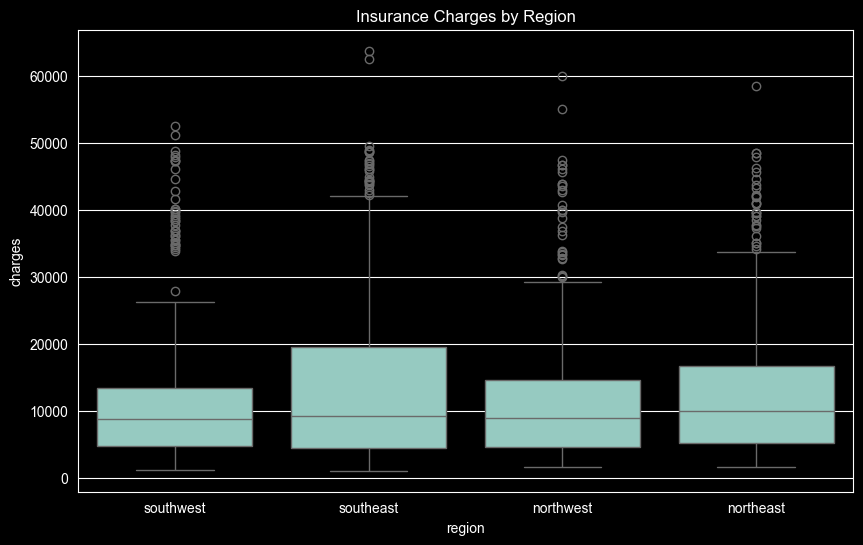

In [6]:
#Unterschiede nach Region
df.groupby("region")["charges"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Insurance Charges by Region")
plt.show()

*Südosten und Nordosten tendenziell kostenintensiver

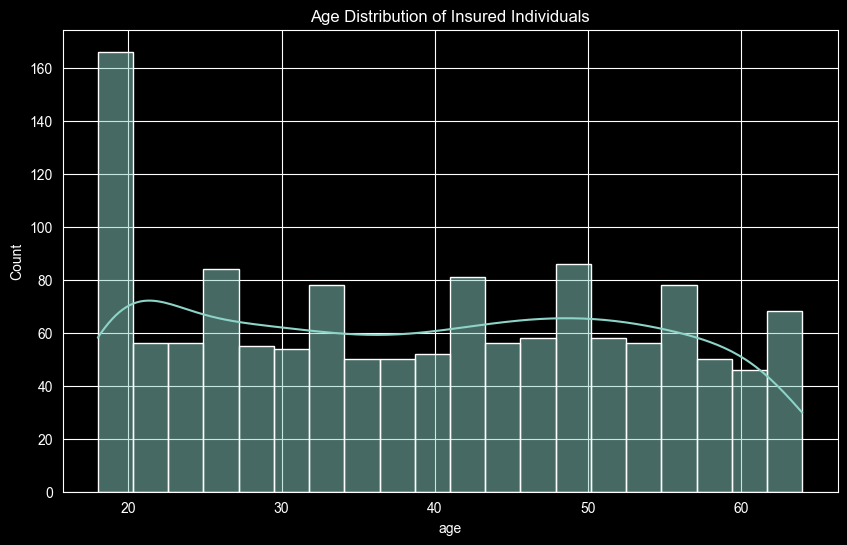

In [7]:
#Altersverteilung der Stichprobe
plt.figure(figsize=(10,6))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution of Insured Individuals")
plt.show()

*Altersverteilung in der Stichprobe relativ gleichmäßig, jedes Jahrzehnt ähnlich stark repräsentiert, mit Ausnahme der u20- Jährigen und der 60+ Fraktion. Leichte Rechtsschiefe

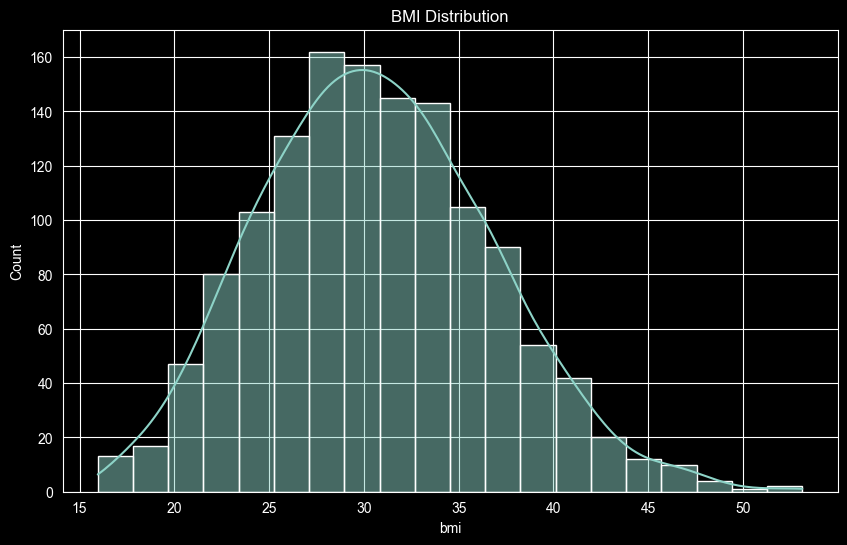

In [8]:
#BMI- Verteilung der Stichprobe
plt.figure(figsize=(10,6))
sns.histplot(df["bmi"], bins=20, kde=True)
plt.title("BMI Distribution")
plt.show()

*BMI- Verteilung wirkt visuell annährend normalverteilt, mit leichter Rechtssschiefe, also tendenziell eher "gesunde" BMIs in der Stichprobe

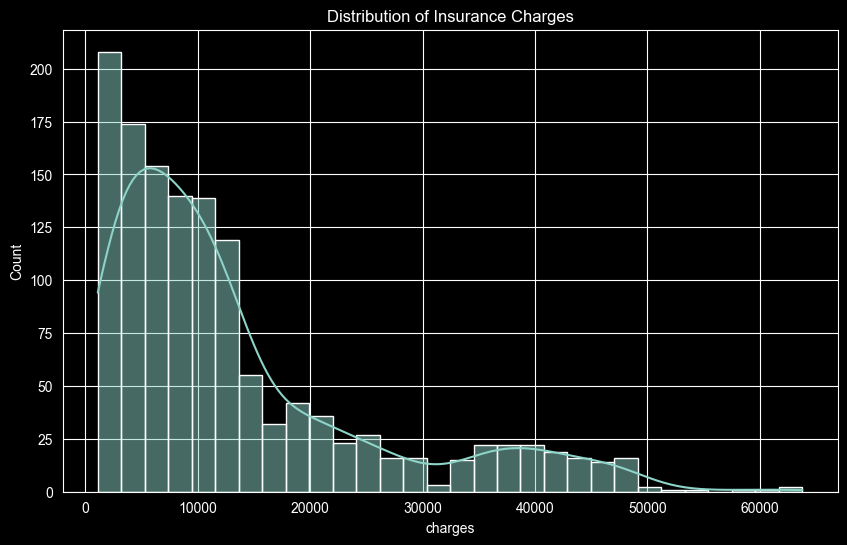

In [9]:
#Verteilung der Versicherungskosten
plt.figure(figsize=(10,6))
sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

*Rechtsschiefe Verteilung, starke Rechtskrümmung, hohe Kurtosis (Spitzgipflig). Die meisten Kosten liegen zw. ca. 1122- ca. 16.640 Euro (3. Quartil, 75% der Daten).

Was erklärt dann das letzte Quartil mit bis zu 63770 Euro an Kosten? Gibt es dafür eine (statistische) Erklärung?

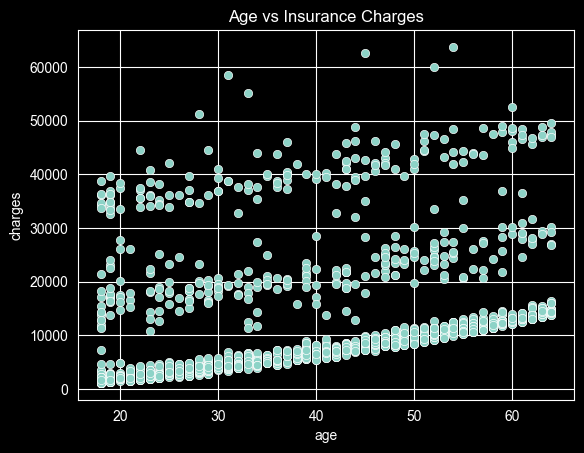

In [10]:
#Verteilung der Kosten nach Alter im Scatterplot
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Insurance Charges")
plt.show()

*Tendenziell höhere Kosten mit steigendem Alter.

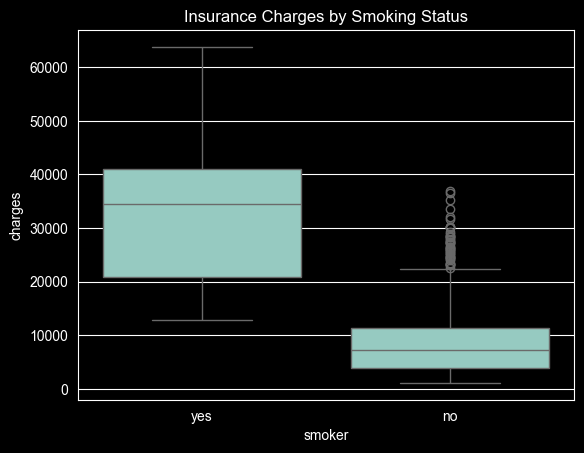

In [11]:
#Verteilung von Rauchern und Nichtrauchern im Boxplot (inkl. Ausreißern)
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Insurance Charges by Smoking Status")
plt.show()

*Scheinbar auch höhrere Kosten für Raucher

In [12]:
#Vergleich Raucher/Nichtraucher als Tabelle
df.groupby("smoker")["charges"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


*Obwohl nur ca. 1/4 der Patienten Raucher sind, verursachen sie im Schnitt fast das Vierfache an Kosten! (N= 1064; 274), (MW: 8434; 32050). Aufgrund der starken Rechtsschiefe ist der Median hier aber aussagekräftiger und der Unterschied noch größer: (7345; 34456).

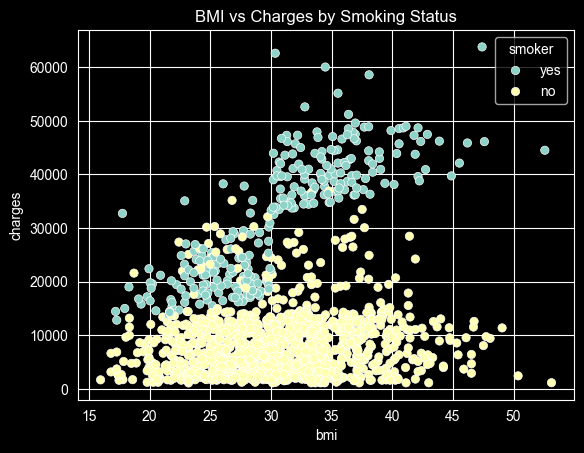

In [13]:
#Scatterplot Raucher/Nichtraucher
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
plt.title("BMI vs Charges by Smoking Status")
plt.show()

*Linearer Effekt von Rauchen auf Kosten visuell erkennbar.

In [14]:
#Erstes Regressionsmodell (Tests folgen später, dient nur der Illustration und erster Überlegung)
from sklearn.linear_model import LinearRegression

X = df[["age", "bmi", "children"]]
y = df["charges"]

model = LinearRegression()
model.fit(X, y)

print("Modell R²:", model.score(X, y))

Modell R²: 0.12009819576246927


*Modell ohne Rauchen erklärt ca. 12% der Varianz (von Versicherungskosten).

Nun wird Rauchen mit ins Modell aufgenommen:

In [15]:
#Dummy-Variable Rauchen nun Teil des Modells
df["smoker_num"] = df["smoker"].map({"yes": 1, "no": 0})

X = df[["age", "bmi", "children", "smoker_num"]]
y = df["charges"]

model = LinearRegression()
model.fit(X, y)

print("Modell R²:", model.score(X, y))

Modell R²: 0.749694530346479


*Modell erklärt nun ca. 75% der Varianz!

In [16]:
#Regressionsvoraussetzungen 1 (Normalverteilung, Autokorrelation)
import statsmodels.api as sm

X = df[["age", "bmi", "children", "smoker_num"]]
X = sm.add_constant(X)

ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Mon, 02 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:51:54   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

*Signifikanter JB-Test: Keine Normalverteilung, Voraussetzung nicht erfüllt

*DW-Test gut (2.087): keine Autokorrelation, Voraussetzung erfüllt

*Starke Schiefe (Skew) und Kurtosis- kann Tests beeinflussen

In [17]:
#Log-Trimmung (Extremwerte werden weniger stark gewichtet, empfohlen bei steilen und schiefen Verteilungen)
import numpy as np
df["log_charges"] = np.log(df["charges"])

In [18]:
#Regressionsvoraussetzungen 2 (Heteroskedastizität)
from statsmodels.stats.diagnostic import het_white

residuals = ols.resid
exog = ols.model.exog

white_test = het_white(residuals, exog)
labels = ["LM stat", "LM p-value", "F stat", "F p-value"]
dict(zip(labels, white_test))

{'LM stat': np.float64(128.47065644118692),
 'LM p-value': np.float64(4.214011485296054e-21),
 'F stat': np.float64(10.81763109783478),
 'F p-value': np.float64(3.0407780664912277e-22)}

*Signifikanter White-Test ~ Heteroskedastizität d. Residuen, Voraussetzung nicht erfüllt

In [19]:
#Daher HC3-Korrektur (robuster Standardfehler)
ols_robust = ols.get_robustcov_results(cov_type="HC3")
print(ols_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.1
Date:                Mon, 02 Feb 2026   Prob (F-statistic):          1.17e-294
Time:                        15:51:54   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    991.497    -12.207      0.0

Erklärung: Durch HC3- Korrektur werden robuste Standardfehler verwendet- ermöglicht Berechnung d. Regression trotz Heteroskedastizität

**Alle Haupteffekte signifikant, dh alle Prädiktoren wirken sich signifikant (positiv) auf die Kosten aus.

In [20]:
tvals = ols.tvalues
df_resid = ols.df_resid

partial_r2 = (tvals**2) / (tvals**2 + df_resid)
partial_r2 = partial_r2.drop("const")

print("Partial R² pro Prädiktor:")
print(partial_r2.sort_values(ascending=False))

Partial R² pro Prädiktor:
smoker_num    0.715530
age           0.260590
bmi           0.093939
children      0.008781
dtype: float64


Partielles R²: Wv Varianz wird durch jeweiligen Prädiktor im Modell erklärt?

In [21]:
def r2_for(cols):
    X = sm.add_constant(df[cols])
    return sm.OLS(y, X).fit().rsquared

cols_full = ["age", "bmi", "children", "smoker_num"]
r2_full = r2_for(cols_full)

semi_partial = {}
for col in cols_full:
    cols_minus = [c for c in cols_full if c != col]
    semi_partial[col] = r2_full - r2_for(cols_minus)

semi_partial = pd.Series(semi_partial).sort_values(ascending=False)
print("Semi-partial R² (ΔR², wenn Variable hinzukommt/entfällt):")
print(semi_partial)

Semi-partial R² (ΔR², wenn Variable hinzukommt/entfällt):
smoker_num    0.629596
age           0.088215
bmi           0.025951
children      0.002217
dtype: float64


Semi- partielles R²: Wv Varianz wird durch jeden Prädiktor erklärt + Wv Varianz verbleibt nach Entfernen der anderen Prädiktoren?

*Gibt Hinweise auf Interaktionseffekte zw. Prädiktoren- Varianz sinkt bei jedem Prädoktor, bei Alter ( von part. R²: 26%) auf semi- part.: 9%) zb am stärksten. Wird der positive Effekt von Alter auf die Kosten also von einem anderen Faktor beeinflusst?

-> genau das soll nun untersucht werden, mithilfe einer Moderationsanalyse durch den Faktor "Rauchen". Wirkt Rauchen also als Moderator auf den Effekt von Alter auf die Kosten?

Zuerst wird eine neue Variable gebildet, "age_smoker", aus den MW der Prädiktoren "age" und "smoker_num".

In [22]:
df["age_smoker"] = df["age"] * df["smoker_num"]

Erneute Regressionsanalyse inkl. Moderationsanalyse für "age_smoker"

In [23]:
X = df[["age", "bmi", "children", "smoker_num", "age_smoker"]]
X = sm.add_constant(X)
y = df["charges"]  # optional: df["log_charges"]

age_mod = sm.OLS(y, X).fit(cov_type="HC3")
print(age_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     499.4
Date:                Mon, 02 Feb 2026   Prob (F-statistic):          2.53e-302
Time:                        15:51:55   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.178e+04    973.439    -12.098      0.0

**Ergebnis: KEINE Moderation durch Rauchen (p = >.05).

Trotzdem Überprüfung durch Liniendiagramm

In [24]:
age_range = np.linspace(df["age"].min(), df["age"].max(), 100)
bmi_mean = df["bmi"].mean()
children_mean = df["children"].mean()

#DataFrame für Vorhersagen bauen, diese Variablen kommen der Einfachheit halber NICHT in Grafik vor
pred_df_no = pd.DataFrame({
    "age": age_range,
    "bmi": bmi_mean,
    "children": children_mean,
    "smoker_num": 0,
})
pred_df_no["age_smoker"] = pred_df_no["age"] * pred_df_no["smoker_num"]

pred_df_yes = pred_df_no.copy()
pred_df_yes["smoker_num"] = 1
pred_df_yes["age_smoker"] = pred_df_yes["age"] * pred_df_yes["smoker_num"]

#WICHTIG: Konstante erzwingen + Spalten an Modell anpassen
pred_exog_no  = sm.add_constant(pred_df_no,  has_constant="add")
pred_exog_yes = sm.add_constant(pred_df_yes, has_constant="add")

#Gleiche Spalten/Reihenfolge wie im Modell
pred_exog_no  = pred_exog_no[age_mod.model.exog_names]
pred_exog_yes = pred_exog_yes[age_mod.model.exog_names]

pred_no  = age_mod.predict(pred_exog_no)
pred_yes = age_mod.predict(pred_exog_yes)

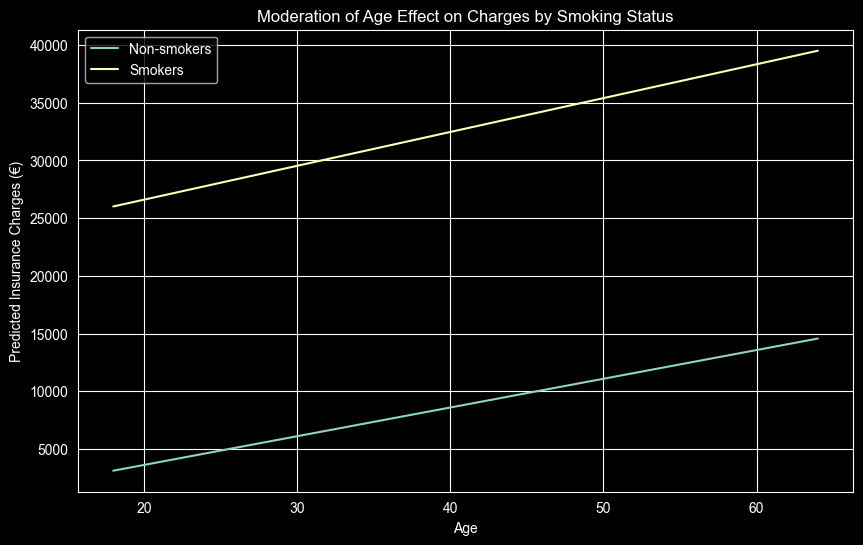

In [25]:
#Grafik beschriften
plt.figure(figsize=(10,6))
plt.plot(age_range, pred_no, label="Non-smokers")
plt.plot(age_range, pred_yes, label="Smokers")
plt.xlabel("Age")
plt.ylabel("Predicted Insurance Charges (€)")
plt.title("Moderation of Age Effect on Charges by Smoking Status")
plt.legend()
plt.show()

*Leichter Trend erkennbar, jedoch liegt kein Moderationseffekt vor.

"Verursachen" Raucher nun also wirklich höhere Kosten als Nichtraucher?

In [26]:
#slope/coeff für Raucher und Nichtraucher definieren
b_age = age_mod.params["age"]
b_int = age_mod.params["age_smoker"]

slope_nonsmoker = b_age
slope_smoker = b_age + b_int

import statsmodels.stats.api as sms

cov = age_mod.cov_params()

# SE für Raucher-Slope/coeff definieren
se_smoker = np.sqrt(
    cov.loc["age","age"] +
    cov.loc["age_smoker","age_smoker"] +
    2*cov.loc["age","age_smoker"]
)

t_smoker = slope_smoker / se_smoker

from scipy import stats

#T- und p- Wert berechnen
df_resid = age_mod.df_resid
p_smoker = 2 * (1 - stats.t.cdf(abs(t_smoker), df_resid))
print("Coeff Non-Smoker:", slope_nonsmoker)
print("Coeff Smoker:", slope_smoker)
print("SE Smoker:", se_smoker)
print("t-Value:", t_smoker)
print("p-Value:", p_smoker)

Coeff Non-Smoker: 248.90350267577256
Coeff Smoker: 293.32577578589655
SE Smoker: 37.808980373375746
t-Value: 7.758098020343604
p-Value: 1.709743457922741e-14


*Ein Nichtraucher würde also ca. 249 Euro, ein Raucher 293 Euro pro zusätzlichem Lebensjahr (44 Euro Differenz!) bei gegebener Signifikanz des Moderatoreffekts erzeugen. Dieser Rückschluss ist hier deshalb leider nicht zulässig!

***FAZIT: Alle Haupteffekte sind assoziiert mit signifikanten Kostenanstiegen.

****Rauchen moderiert nicht den Effekt von steigendem Alter auf steigende Kosten, stellt aber unter den Haupteffekten den wichtigsten Prädiktor für hohe Kosten (nach HC3-Korrektur und Log-Transformation) dar- obwohl Raucher in dieser Stichprobe sogar unterrepräsentiert sind!

****Rauchen ist auch bei den U20 Jährigen schon mit höheren Kosten assoziiert!

Empfehlung: verstärkt auf Rauchprävention setzen, auch in Schulen schon. Ausstiegsangebote machen und Alternativen anbieten (Nikotinkaugummis, Snus, Hilfestellen)